In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
from sklearn.svm import SVC

# Initialize the SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)

# Train the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC()

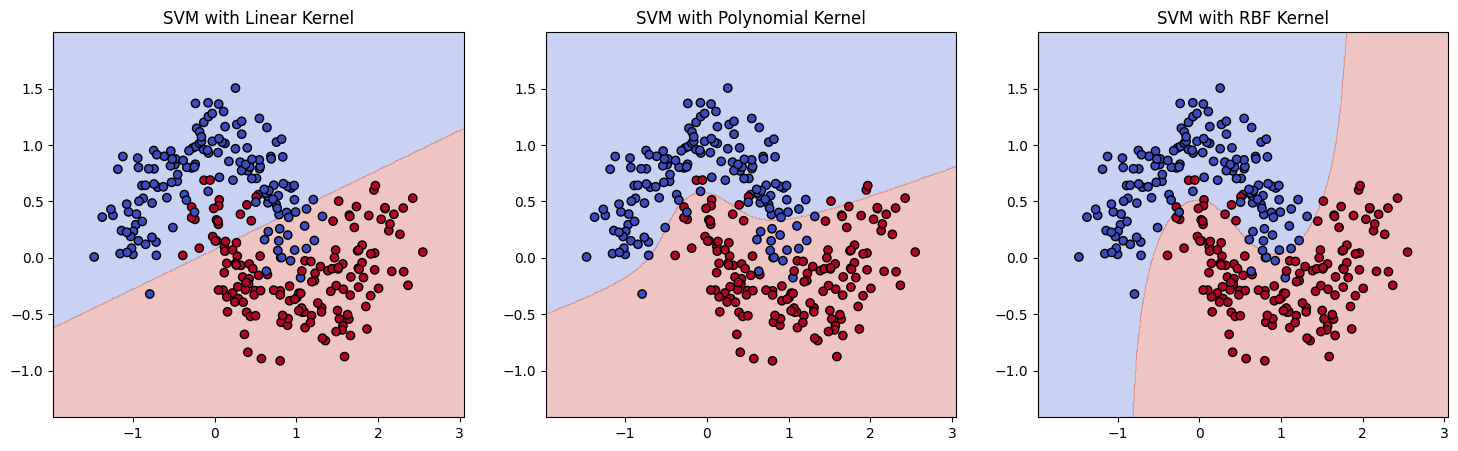

In [3]:
def plot_decision_boundary(clf, X, y, title, ax):
    # Define the grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

# Create a plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(svm_linear, X, y, 'SVM with Linear Kernel', axes[0])
plot_decision_boundary(svm_poly, X, y, 'SVM with Polynomial Kernel', axes[1])
plot_decision_boundary(svm_rbf, X, y, 'SVM with RBF Kernel', axes[2])

plt.show()


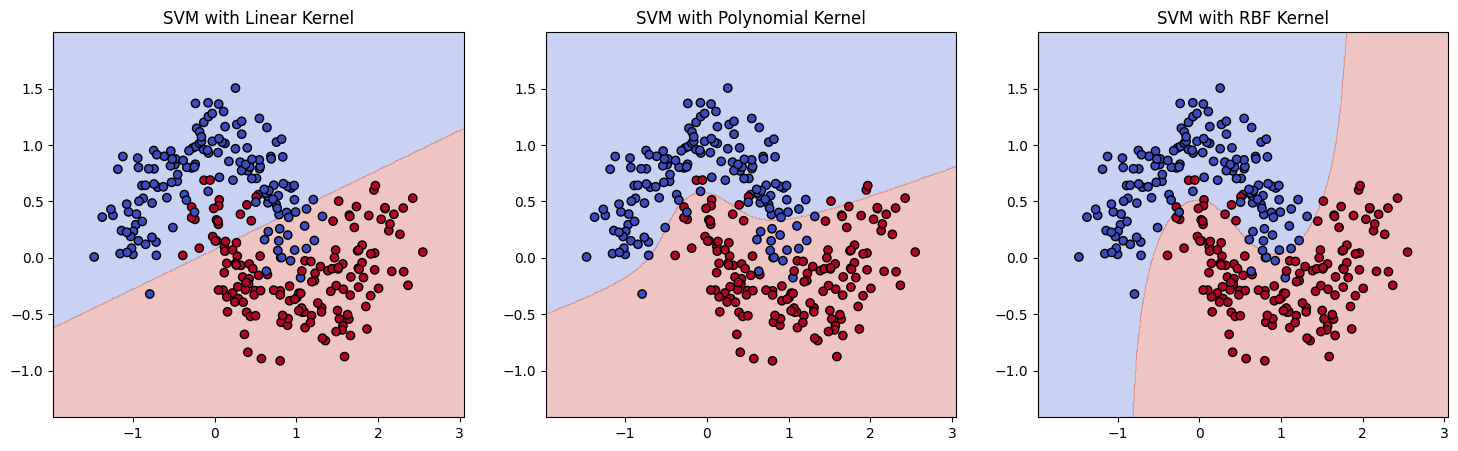